In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#plt.style.available

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

In [3]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score

In [4]:
data = pd.read_csv("/kaggle/input/survival-from-malignant-melanoma/melanoma.csv")
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head()

,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1


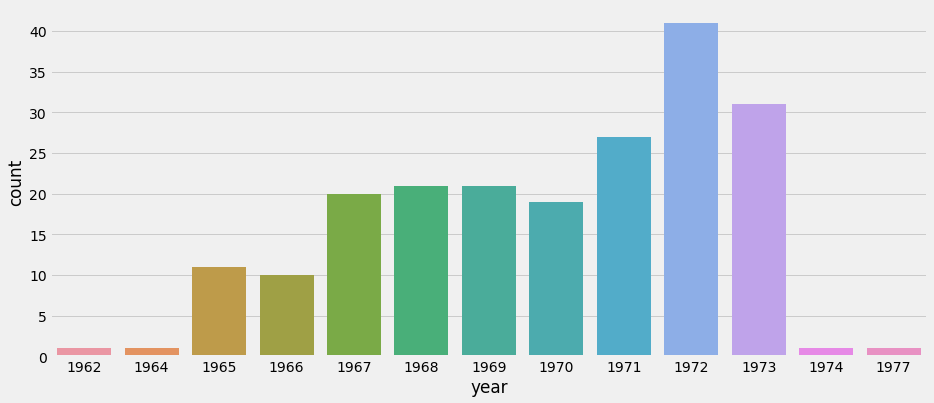

In [5]:
sns.countplot(x="year",data=data)
plt.show()

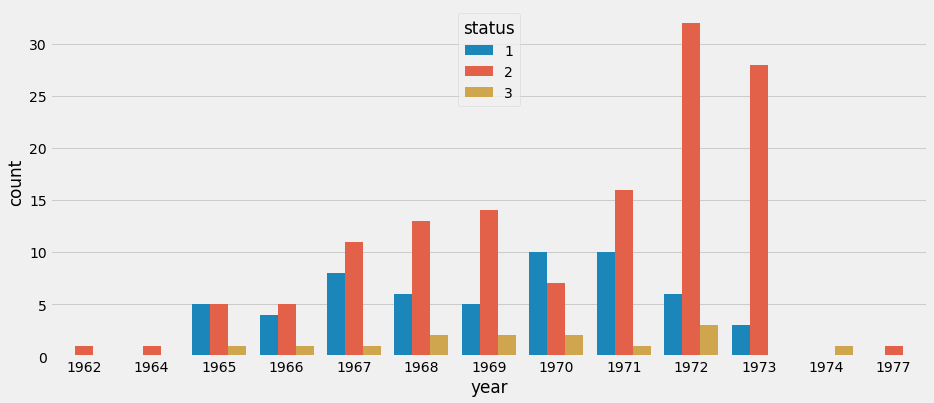

In [6]:
sns.countplot(x="year",hue="status",data=data)
plt.show()

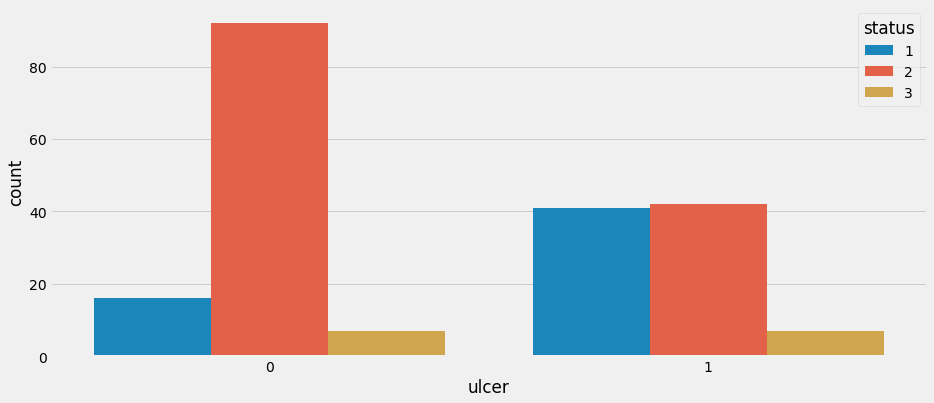

In [7]:
sns.countplot(x="ulcer",hue="status",data=data)
plt.show()

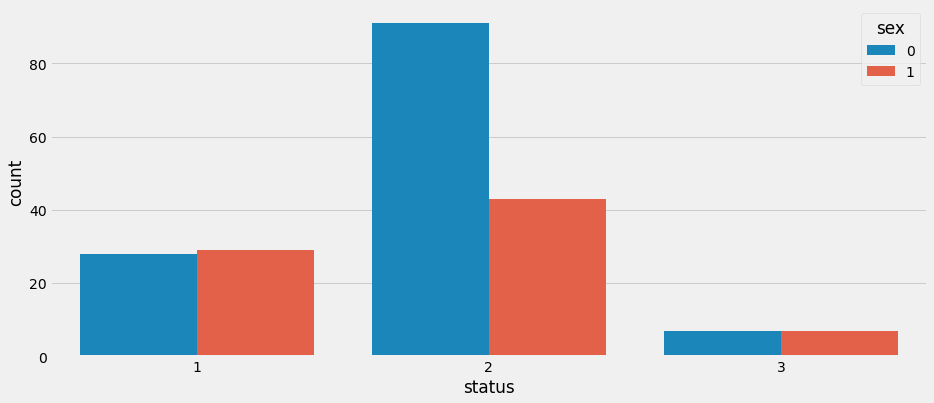

In [8]:
sns.countplot(x="status",hue="sex",data=data)
plt.show()

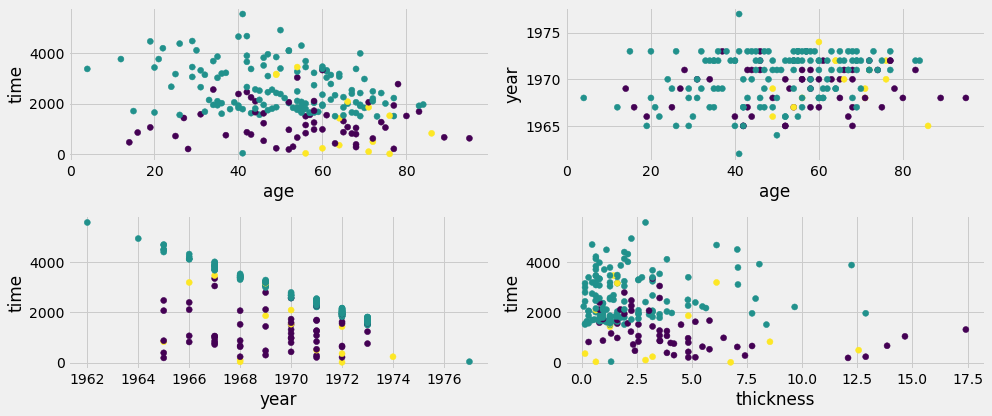

In [9]:
plt.subplot(2,2,1)
plt.scatter(x="age",y="time",c="status",data=data)
plt.xlabel("age")
plt.ylabel("time")
plt.subplot(2,2,2)
plt.scatter(x="age",y="year",c="status",data=data)
plt.xlabel("age")
plt.ylabel("year")
plt.subplot(2,2,3)
plt.scatter(x="year",y="time",c="status",data=data)
plt.xlabel("year")
plt.ylabel("time")
plt.subplot(2,2,4)
plt.scatter(x="thickness",y="time",c="status",data=data)
plt.xlabel("thickness")
plt.ylabel("time")
plt.tight_layout()
plt.show()

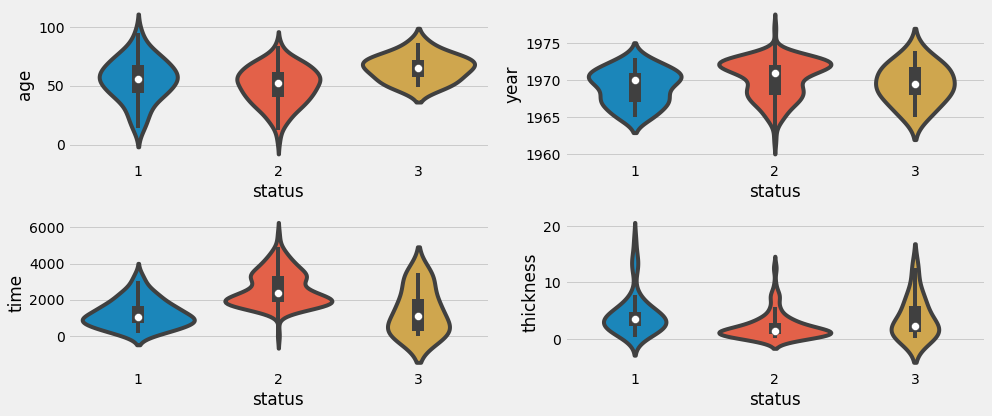

In [10]:
plt.subplot(2,2,1)
sns.violinplot(x="status",y="age",data=data)
plt.subplot(2,2,2)
sns.violinplot(x="status",y="year",data=data)
plt.subplot(2,2,3)
sns.violinplot(x="status",y="time",data=data)
plt.subplot(2,2,4)
sns.violinplot(x="status",y="thickness",data=data)
plt.tight_layout()
plt.show()

In [11]:
X=data.drop(["status"],axis=1)
y=data.status
X_train, X_test, y_tain, y_test = train_test_split(X,y,test_size=0.50,random_state=42)

In [12]:
model1 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model1.fit(X_train,y_tain)

KNeighborsClassifier()

In [13]:
print(model1.score(X_train,y_tain))
print(model1.score(X_test,y_test))
model1_train = model1.score(X_train,y_tain)
model1_test = model1.score(X_test,y_test)

0.8431372549019608
0.8349514563106796


In [14]:
pred1 = model1.predict(X_test)

In [15]:
confusion_matrix(y_test,pred1)

array([[20,  9,  0],
       [ 0, 66,  1],
       [ 3,  4,  0]])

In [16]:
mdl1 = accuracy_score(y_test,pred1)

In [17]:
model2 = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=800,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model2.fit(X_train,y_tain)

LogisticRegression(C=0.1, max_iter=800)

In [18]:
print(model2.score(X_train,y_tain))
print(model2.score(X_test,y_test))

0.8431372549019608
0.8058252427184466


In [19]:
pred2 = model2.predict(X_test)

In [20]:
confusion_matrix(y_test,pred2)

array([[20,  7,  2],
       [ 5, 62,  0],
       [ 2,  4,  1]])

In [21]:
mdl2 = accuracy_score(y_test,pred2)

In [22]:
model3 = MLPClassifier(learning_rate_init=0.0001,hidden_layer_sizes=(150,75,50,25),max_iter=3000)
model3.fit(X_train,y_tain)

MLPClassifier(hidden_layer_sizes=(150, 75, 50, 25), learning_rate_init=0.0001,
              max_iter=3000)

In [23]:
print(model3.score(X_train,y_tain))
print(model3.score(X_test,y_test))

0.8823529411764706
0.8155339805825242


In [24]:
pred3 = model3.predict(X_test)

In [25]:
confusion_matrix(y_test,pred3)

array([[20,  8,  1],
       [ 2, 64,  1],
       [ 3,  4,  0]])

In [26]:
mdl3 = accuracy_score(y_test,pred3)

In [27]:
comparison = {"accuracy score":[mdl1,mdl2,mdl3]}
comparison = pd.DataFrame(comparison)
comparison.index = ["Model 1(KNeighborsClassifier)","model 2(LogisticRegression)","Model 3(MLPClassifier)"]
comparison

,accuracy score
Model 1(KNeighborsClassifier),0.834951
model 2(LogisticRegression),0.805825
Model 3(MLPClassifier),0.815534


In [28]:
cluster1 = KMeans(n_clusters=3)
cluster1.fit(X)

KMeans(n_clusters=3)

In [29]:
y1=cluster1.labels_

In [30]:
cluster2 = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        )
cluster2.fit(X)

AgglomerativeClustering(n_clusters=3)

In [31]:
y2=cluster2.labels_

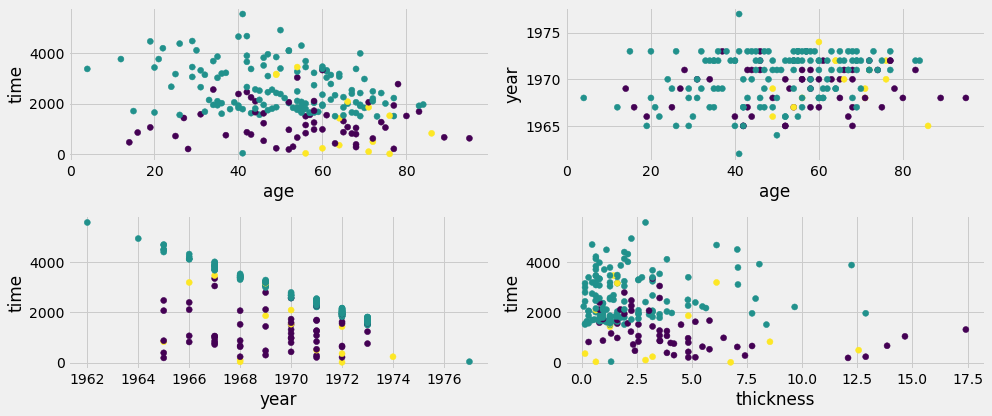

In [32]:
plt.subplot(2,2,1)
plt.scatter(x="age",y="time",c="status",data=data)
plt.xlabel("age")
plt.ylabel("time")
plt.subplot(2,2,2)
plt.scatter(x="age",y="year",c="status",data=data)
plt.xlabel("age")
plt.ylabel("year")
plt.subplot(2,2,3)
plt.scatter(x="year",y="time",c="status",data=data)
plt.xlabel("year")
plt.ylabel("time")
plt.subplot(2,2,4)
plt.scatter(x="thickness",y="time",c="status",data=data)
plt.xlabel("thickness")
plt.ylabel("time")
plt.tight_layout()
plt.show()

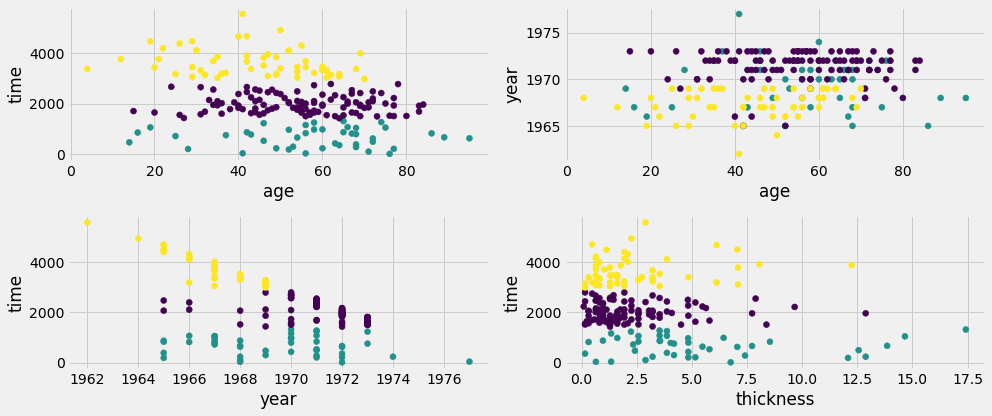

In [33]:
plt.subplot(2,2,1)
plt.scatter(x="age",y="time",c=y1,data=data)
plt.xlabel("age")
plt.ylabel("time")
plt.subplot(2,2,2)
plt.scatter(x="age",y="year",c=y1,data=data)
plt.xlabel("age")
plt.ylabel("year")
plt.subplot(2,2,3)
plt.scatter(x="year",y="time",c=y1,data=data)
plt.xlabel("year")
plt.ylabel("time")
plt.subplot(2,2,4)
plt.scatter(x="thickness",y="time",c=y1,data=data)
plt.xlabel("thickness")
plt.ylabel("time")
plt.tight_layout()
plt.show()

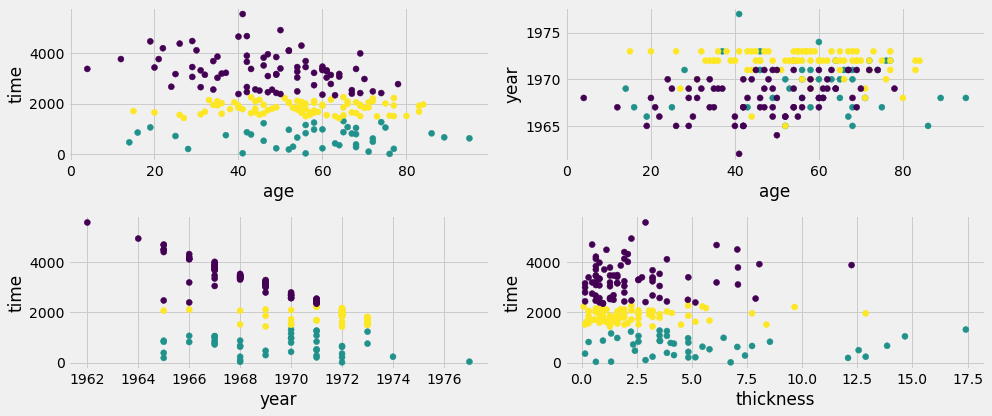

In [34]:
plt.subplot(2,2,1)
plt.scatter(x="age",y="time",c=y2,data=data)
plt.xlabel("age")
plt.ylabel("time")
plt.subplot(2,2,2)
plt.scatter(x="age",y="year",c=y2,data=data)
plt.xlabel("age")
plt.ylabel("year")
plt.subplot(2,2,3)
plt.scatter(x="year",y="time",c=y2,data=data)
plt.xlabel("year")
plt.ylabel("time")
plt.subplot(2,2,4)
plt.scatter(x="thickness",y="time",c=y2,data=data)
plt.xlabel("thickness")
plt.ylabel("time")
plt.tight_layout()
plt.show()